In [1]:
# Created 9/1/2025 12:42pm

In [6]:
import numpy as np
from kevlib.utils.plot import plot_images

import matplotlib.pyplot as plt

# Load existing links and group by repeating detections

In [35]:
good_speed_chains = []

with open('stspaper_good_speed_chains_4and5.txt', 'r') as f:
    for line in f:

        sublist = list(map(int, line.strip().split()))
        if len(sublist) >=4:
            good_speed_chains.append(sublist)

good_angle_chains = [1, 5, 10, 12, 13, 22, 26, 29, 33, 35, 40, 45, 47, 55, 58, 63, 70, 74, 78, 80, 85, 86, 87, 91, 92, 107, 109, 114, 119, 120, 123, 126, 127, 130, 134, 138, 139, 148, 149, 151, 154, 157, 164, 166, 168, 178, 181, 185, 194, 198, 203, 208, 210, 228, 229, 234, 236, 238, 242, 247, 268, 279, 310, 317, 327, 328, 336, 337, 345, 348, 351, 352, 357, 359, 361, 369, 370, 373, 382, 386, 400, 405, 417, 419, 420, 424, 431, 434, 435, 440, 450, 457, 462, 477, 480, 497, 508, 512, 516, 521, 532, 538, 539, 543, 557, 558, 561, 562, 570, 575, 577, 586, 587, 594, 599, 601, 609, 611, 613, 614, 616, 618, 619, 621, 622, 632, 653, 657, 671, 672, 673, 683, 694, 697, 704, 708, 710, 712, 715, 716, 717, 727, 728, 734, 735, 737, 740, 747, 766, 779, 791, 795, 802, 804, 811, 812, 819, 821, 822, 830, 832, 845, 853, 854, 862, 863, 865, 868, 877, 889, 892]
good_speed_angle_chains = [good_speed_chains[i] for i in range(len(good_speed_chains)) if i in good_angle_chains]
len(good_speed_angle_chains)

171

In [71]:
from collections import Counter
flattened = [item for sublist in good_speed_angle_noise_chains for item in sublist]
counts = Counter(flattened)
num_repeats = sum(1 for count in counts.values() if count > 1)

print(f"Number of repeated integers: {num_repeats}")





from collections import defaultdict, deque
from itertools import combinations

def group_conflicting_tracklets(tracklets):
    n = len(tracklets)

    detection_to_tracklets = defaultdict(set)
    for i, track in enumerate(tracklets):
        for det in track:
            detection_to_tracklets[det].add(i)

    adjacency = defaultdict(set)
    for shared in detection_to_tracklets.values():
        if len(shared) > 1:
            for a, b in combinations(shared, 2):
                adjacency[a].add(b)
                adjacency[b].add(a)

    visited = set()
    groups = []

    for i in range(n):
        if i not in visited:
            stack = [i]
            group = []
            while stack:
                node = stack.pop()
                if node not in visited:
                    visited.add(node)
                    group.append(node)
                    stack.extend(adjacency[node] - visited)
            if len(group) > 1:
                groups.append(group)
    grouped_tracklets = [[tracklets[i] for i in group] for group in groups]
    return grouped_tracklets
grouped_links_noise =  group_conflicting_tracklets(good_speed_angle_noise_chains)

Number of repeated integers: 12


In [ ]:
p_noise

In [73]:
grouped_links_noise

[[[83823, 94954, 103412, 108872], [88981, 94954, 103412, 108872]],
 [[91573, 100705, 107646, 113570, 118114],
  [97377, 104639, 107646, 113570, 118114],
  [100705, 107646, 113570, 118114],
  [104639, 107646, 113570, 118114]],
 [[96277, 105393, 106910, 112439, 119157], [105393, 106910, 112439, 119157]]]

In [74]:
grouped_indices = []

# grouped_links_noise_flattened = [a for c in grouped_links_noise for a in c]
for g_chain in grouped_links_noise:
    curr_group = []
    
    for g_inner_chain in g_chain:
        
        for i, all_chain in enumerate(good_speed_angle_noise_chains):
            if g_inner_chain == all_chain:
                curr_group.append(i)

    grouped_indices.append(curr_group)

In [79]:
grouped_indices

[[57, 69], [72, 79, 86, 89], [78, 91]]

In [98]:
nonselected_indices = [69, 72, 86, 89, 91]

In [99]:
final_discoveries = [good_speed_angle_noise_chains[i] for i in range(len(good_speed_angle_noise_chains)) if i not in nonselected_indices]
len(final_discoveries)

108

In [102]:
import pickle
with open('final_discoveries.pkl', 'wb') as f:
    pickle.dump(final_discoveries, f)

In [189]:
grouped_links_noise

[[[83823, 94954, 103412, 108872], [88981, 94954, 103412, 108872]],
 [[91573, 100705, 107646, 113570, 118114],
  [97377, 104639, 107646, 113570, 118114],
  [100705, 107646, 113570, 118114],
  [104639, 107646, 113570, 118114]],
 [[96277, 105393, 106910, 112439, 119157], [105393, 106910, 112439, 119157]]]

In [199]:
print(good_speed_angle_chains[133])

[105393, 106910, 112439, 119157]


In [34]:
# final_discoveries[133]

# Plot background vs. candidate images filters

In [70]:
len(patches)

687

In [21]:
plt.close()

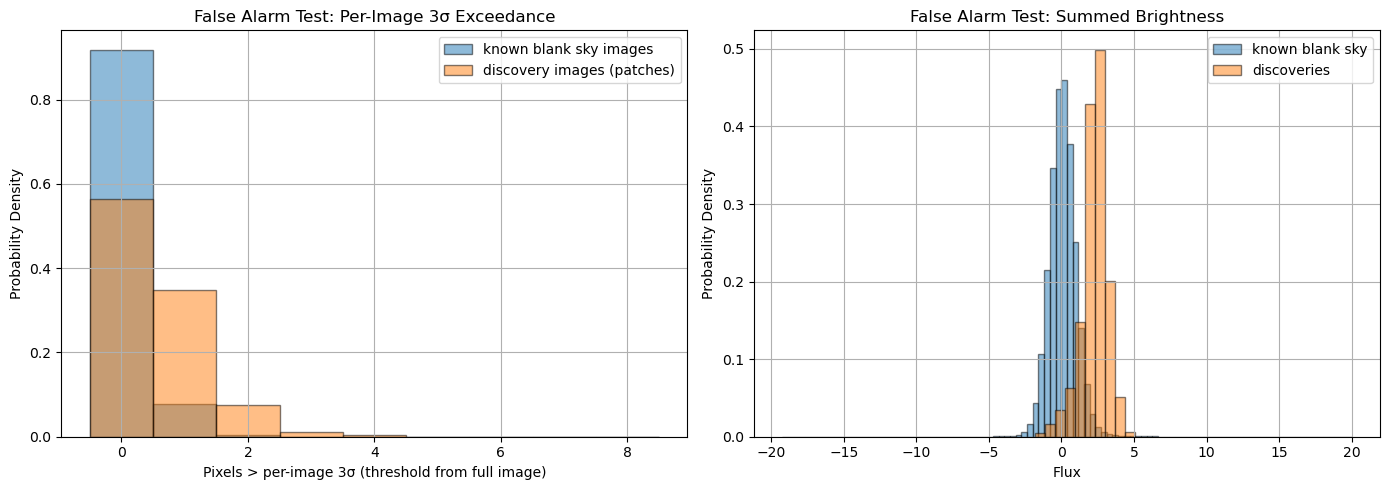

In [22]:
# run all images through filters:
"""
1. collect 15x15 image frames
2. collect 15x15 binary masks
"""

all_searched_grids = np.load("./Searches/2_S1_DarkPixelsRemoved_Normalized_FinalDeployGrids.npy")
masks_15px= np.load("./Searches/binary_masked_grids_15px.npy")
masks_4px = masks_15px[:, 6:10, 6:10]
sums = [masks_4px[i].sum() for i in range(len(masks_4px))]

g_idxs = [i for i in range(len(sums)) if sums[i] <=3]

plt.close()
plt.figure(figsize=(10,5))

A_full = [all_searched_grids[i] for i in g_idxs]
A_full = np.array(A_full)
A_crop = A_full[:, 6:10, 6:10]
means_false = A_full.mean(axis=(1, 2))
stds_false = A_full.std(axis=(1, 2))
thresholds_false = means_false + 3 * stds_false
thresholds_false = thresholds_false[:, np.newaxis, np.newaxis]
count_above_3sigma_false = np.sum(A_crop > thresholds_false, axis=(1, 2))

plt.hist(count_above_3sigma_false, bins=np.arange(0, 10)-0.5, edgecolor='black', alpha=0.5,
         label="known blank sky images", density=True)


ims=np.load("./unique_Images_v3_pt4.npy")
pix_coords = np.load("./unique_pixCoords_v3_pt4.npy")
all_ims = []
patches = []
patch_size=4
for tracklet in good_speed_angle_chains:
    for idx in tracklet:
        im = ims[idx]
        all_ims.append(im)
        
        H, W = (15,15)
        half = patch_size // 2
   
        x, y = int(pix_coords[idx][0]), int(pix_coords[idx][1])

        x_start = np.clip(x - half, 0, W - patch_size)
        y_start = np.clip(y - half, 0, H - patch_size)

        patch = im[y_start:y_start + patch_size, x_start:x_start + patch_size]
        patches.append(patch)




all_ims = np.array(all_ims)
patches = np.array(patches)

means_all = all_ims.mean(axis=(1, 2))
stds_all = all_ims.std(axis=(1, 2))
thresholds_all = means_all + 3 * stds_all
thresholds_all = thresholds_all[:, np.newaxis, np.newaxis]

count_above_3sigma_patches = np.sum(patches > thresholds_all, axis=(1, 2))



plt.close()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: count_above_3sigma
axes[0].hist(count_above_3sigma_false, bins=np.arange(0, 10)-0.5,
             edgecolor='black', alpha=0.5, label="known blank sky images", density=True)

axes[0].hist(count_above_3sigma_patches, bins=np.arange(0, 10)-0.5,
             edgecolor='black', alpha=0.5, label="discovery images (patches)", density=True)

axes[0].set_xlabel('Pixels > per-image 3σ (threshold from full image)')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('False Alarm Test: Per-Image 3σ Exceedance')
axes[0].legend()
axes[0].grid(True)

# Plot 2: summed brightness
total_brightness_false = np.sum(A_crop, axis=(1, 2))
axes[1].hist(total_brightness_false[(total_brightness_false <= 20) & (total_brightness_false >= -20)],
             edgecolor='black', bins=100, label="known blank sky", density=True, alpha=0.5)

total_brightness_discovery = np.sum(patches, axis=(1, 2))
axes[1].hist(total_brightness_discovery[total_brightness_discovery <= 20],
             edgecolor='black', bins=10, label="discoveries", density=True, alpha=0.5)

axes[1].set_xlabel('Flux')
axes[1].set_ylabel('Probability Density')
axes[1].set_title('False Alarm Test: Summed Brightness')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [34]:
plt.close()

# Compute noise scores for both counts and flux summations

In [36]:
import numpy as np

disc_count = count_above_3sigma_patches # per-image # of pixels > 3sigma
disc_flux = np.sum(patches, axis=(1, 2)) # per-image summed brightness

null_count = count_above_3sigma_false
null_flux = np.sum(A_crop, axis=(1, 2))

p_count = np.array([np.mean(null_count >= c) for c in disc_count])
p_flux  = np.array([np.mean(null_flux  >= f) for f in disc_flux])

p_noise = p_count * p_flux


results = {
    "count": disc_count,
    "flux": disc_flux,
    "p_count": p_count,
    "p_flux": p_flux,
    "p_noise": p_noise
}



np.savez("unique_images_noise_scores.npz", **results)

for i in range(min(10, len(disc_count))):
    print(f"Image {i}: count={disc_count[i]}, flux={disc_flux[i]:.2f}, "
          f"p_count={p_count[i]:.3f}, p_flux={p_flux[i]:.3f}, "
          f"p_noise={p_noise[i]:.3e}")


Image 0: count=1, flux=2.56, p_count=0.081, p_flux=0.016, p_noise=1.305e-03
Image 1: count=1, flux=1.87, p_count=0.081, p_flux=0.035, p_noise=2.811e-03
Image 2: count=1, flux=2.13, p_count=0.081, p_flux=0.024, p_noise=1.973e-03
Image 3: count=2, flux=1.55, p_count=0.004, p_flux=0.057, p_noise=2.380e-04
Image 4: count=2, flux=0.26, p_count=0.004, p_flux=0.409, p_noise=1.705e-03
Image 5: count=0, flux=2.38, p_count=1.000, p_flux=0.019, p_noise=1.864e-02
Image 6: count=1, flux=2.33, p_count=0.081, p_flux=0.020, p_noise=1.594e-03
Image 7: count=2, flux=2.76, p_count=0.004, p_flux=0.014, p_noise=5.906e-05
Image 8: count=0, flux=2.45, p_count=1.000, p_flux=0.018, p_noise=1.755e-02
Image 9: count=3, flux=2.51, p_count=0.000, p_flux=0.017, p_noise=4.687e-06


In [37]:
from scipy.stats import combine_pvalues
p_combined = np.array([combine_pvalues([p_count[i], p_flux[i]], method='fisher')[1] 
                       for i in range(len(p_count))])
p_combined[10:15], p_noise[10:15]

results_2 = {
    "count": disc_count,
    "flux": disc_flux,
    "p_count": p_count,
    "p_flux": p_flux,
    "p_noise": p_noise,
    "p_combined":p_combined
}


In [95]:
good_noise_scores_results = {
    key: [values[i] for i in good_noise_indices]
    for key, values in results_2.items()
}

In [31]:
import numpy as np

data = np.load("unique_images_noise_scores.npz")

print(data.files)

count = data["count"]
flux = data["flux"]
p_count = data["p_count"]
p_flux = data["p_flux"]
p_noise = data["p_noise"]

# p_combined = data["p_combined"]
from scipy.stats import combine_pvalues
p_combined = np.array([combine_pvalues([p_count[i], p_flux[i]], method='fisher')[1] 
                       for i in range(len(p_count))])
p_combined[10:15], p_noise[10:15]

results_2 = {
    # "flux": disc_flux,
    "p_count": p_count,
    "p_flux": p_flux,
    "p_noise": p_noise,
    "p_combined":p_combined
}

len(results_2["p_count"])

['count', 'flux', 'p_count', 'p_flux', 'p_noise']


687

## Plot histogram of p_noise scores 

Text(0, 0.5, 'Number of Candidate Images')

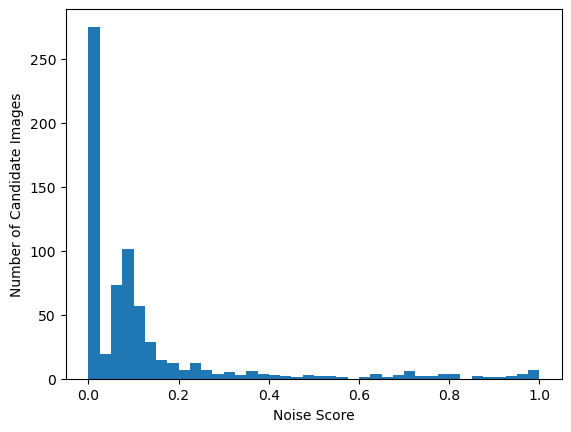

In [38]:
plt.figure()
plt.hist(results_2["p_combined"], bins=40)
plt.xlabel("Noise Score")
plt.ylabel("Number of Candidate Images")

(array([506.,  74.,  24.,  13.,   9.,   6.,   3.,   4.,   3.,   1.,   1.,
          4.,   3.,   3.,   5.,   2.,   1.,   6.,   2.,   0.,   0.,   2.,
          1.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,   0.,   3.,   0.,
          0.,   0.,   1.,   2.,   2.,   0.,   1.]),
 array([4.03369968e-07, 2.46305268e-02, 4.92606502e-02, 7.38907736e-02,
        9.85208970e-02, 1.23151020e-01, 1.47781144e-01, 1.72411267e-01,
        1.97041391e-01, 2.21671514e-01, 2.46301637e-01, 2.70931761e-01,
        2.95561884e-01, 3.20192008e-01, 3.44822131e-01, 3.69452254e-01,
        3.94082378e-01, 4.18712501e-01, 4.43342625e-01, 4.67972748e-01,
        4.92602871e-01, 5.17232995e-01, 5.41863118e-01, 5.66493242e-01,
        5.91123365e-01, 6.15753488e-01, 6.40383612e-01, 6.65013735e-01,
        6.89643858e-01, 7.14273982e-01, 7.38904105e-01, 7.63534229e-01,
        7.88164352e-01, 8.12794475e-01, 8.37424599e-01, 8.62054722e-01,
        8.86684846e-01, 9.11314969e-01, 9.35945092e-01, 9.60575216e-01,
      

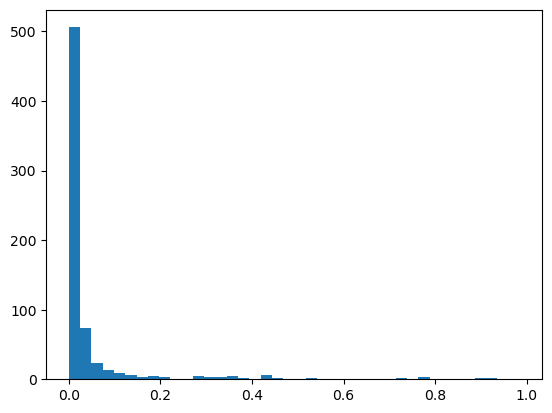

In [61]:
plt.figure()
plt.hist(results["p_noise"], bins=40)

# Plot images of candidates with low noise scores

640 images have p_noise > 0.2


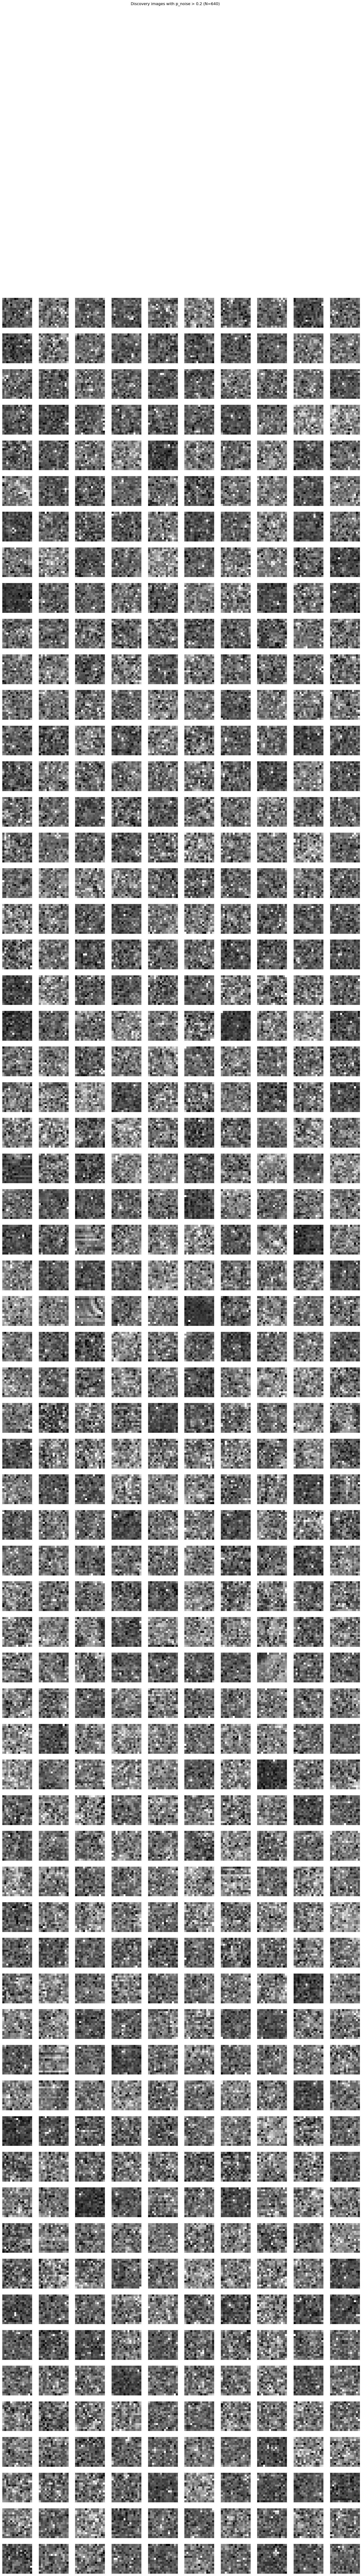

In [39]:
import matplotlib.pyplot as plt
import numpy as np

scores = np.load("unique_images_noise_scores.npz")
p_noise = scores["p_noise"]

threshold = 0.2
mask = p_noise < threshold
selected = all_ims[mask]

print(f"{selected.shape[0]} images have p_noise > {threshold}")

n = len(selected)
if n == 0:
    print("No images exceed threshold.")
else:
    cols = 10
    rows = int(np.ceil(n / cols))
    plt.figure(figsize=(2*cols, 2*rows))
    for i, im in enumerate(selected):
        plt.subplot(rows, cols, i+1)
        plt.imshow(im, cmap="gray", origin="lower")
        plt.axis("off")
    plt.suptitle(f"Discovery images with p_noise > {threshold} (N={n})")
    plt.show()


In [66]:
plt.close()

# Find Flux threshold for filtering

Histogram valley threshold: 2.225


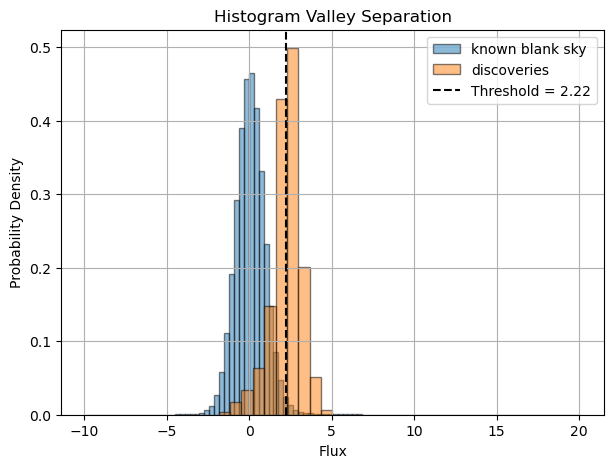

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Data
blank_flux = np.sum(A_crop, axis=(1, 2))
blank_flux = blank_flux[(blank_flux <= 20) & (blank_flux >= -10)]

discovery_flux = np.sum(patches, axis=(1, 2))
discovery_flux = discovery_flux[discovery_flux <= 20]

#Build histogram of combined data
all_flux = np.concatenate([blank_flux, discovery_flux])
counts, bin_edges = np.histogram(all_flux, bins=200, range=(-10,20), density=True)

#Find valley (bin with minimum height between peaks)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

#Only look in the region where the two distributions overlap
left_peak = np.median(blank_flux)# approx blank location
right_peak = np.median(discovery_flux) # approx discovery location

low, high = sorted([left_peak, right_peak])
mask = (bin_centers > low) & (bin_centers < high)

valley_idx = np.argmin(counts[mask])
threshold = bin_centers[mask][valley_idx]

print("Histogram valley threshold:", threshold)

plt.figure(figsize=(7,5))
plt.hist(blank_flux, bins=100, density=True, alpha=0.5, edgecolor='black', label="known blank sky")
plt.hist(discovery_flux, bins=10, density=True, alpha=0.5, edgecolor='black', label="discoveries")
plt.axvline(threshold, color='k', linestyle='--', label=f"Threshold = {threshold:.2f}")

plt.xlabel("Flux")
plt.ylabel("Probability Density")
plt.title("Histogram Valley Separation")
plt.legend()
plt.grid(True)
plt.show()


Histogram valley threshold: 2.225


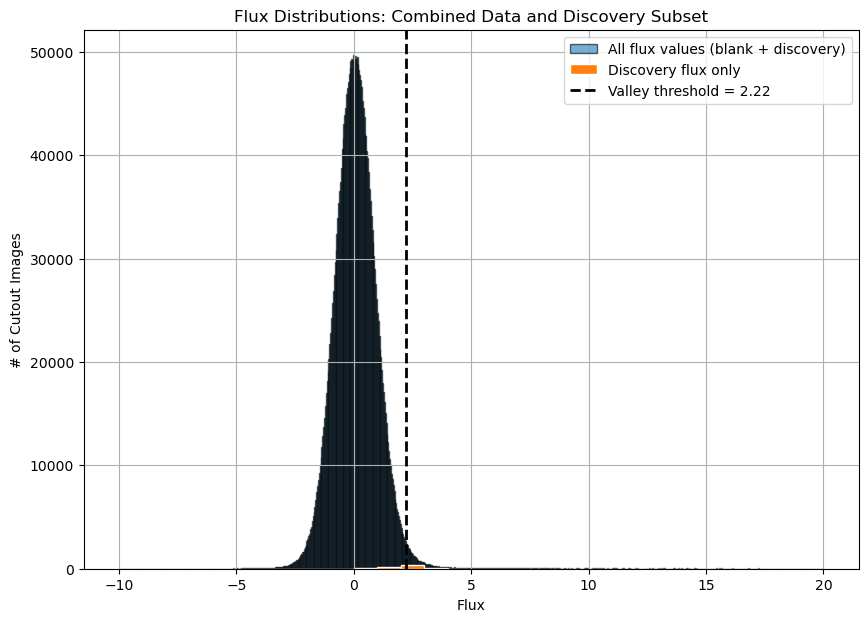

In [148]:
import numpy as np
import matplotlib.pyplot as plt

blank_flux = np.sum(A_crop, axis=(1, 2))
blank_flux = blank_flux[(blank_flux <= 20) & (blank_flux >= -10)]

discovery_flux = np.sum(patches, axis=(1, 2))
discovery_flux = discovery_flux[discovery_flux <= 20]

all_flux = np.concatenate([blank_flux, discovery_flux])

counts, bin_edges = np.histogram(all_flux, bins=200, range=(-10,20))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

left_peak = np.median(blank_flux)
right_peak = np.median(discovery_flux)

low, high = sorted([left_peak, right_peak])
mask = (bin_centers > low) & (bin_centers < high)

valley_idx = np.argmin(counts[mask])
threshold = bin_centers[mask][valley_idx]

print("Histogram valley threshold:", threshold)

plt.figure(figsize=(10, 7))
plt.hist(all_flux, bins=800, range=(-10,20),
         edgecolor='black', alpha=0.6, label="All flux values (blank + discovery)")
plt.hist(discovery_flux, bins=30, range=(-10,20), alpha=1,
         edgecolor='white', label="Discovery flux only")
plt.axvline(threshold, color='k', linestyle='--', linewidth=2,
            label=f"Valley threshold = {threshold:.2f}")

plt.xlabel("Flux")
plt.ylabel("# of Cutout Images")
plt.title("Flux Distributions: Combined Data and Discovery Subset")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
f_d= []

In [40]:
len(ims), len(discovery_flux)

(143561, 687)

# Plot PDF of tracklets

In [100]:
# ras = np.load("./Crosschecked_Dets/unique_ras_v3_pt4.npy")
# decs = np.load("./Crosschecked_Dets/unique_decs_v3_pt4.npy")
# pos_mjds = np.load("./Crosschecked_Dets/unique_mjds_v3_pt4.npy")



# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

# predictedCoords  = np.load("./unique_pixCoords_v3_pt4.npy")
# W2ims            = np.load("./unique_Images_v3_pt4.npy")
# pos_confidences  = np.load("./Searches/v3_all_confidences_S1.npy")
# pos_confidences = [p for p in pos_confidences if p >= 0.4]

# circle_radius = 2
# row_titles    = ['W2ims']
# image_arrays  = [W2ims]
# n_rows_per_chain = len(image_arrays)
# n_rows_with_plot = n_rows_per_chain + 1  # +1 row for RA/DEC plot

# pdf_filename = 'test1.pdf'

# def angle_from_horizontal(p1, p2):
#     #Angle (degrees) between p1->p2 vector and horizontal axis
#     delta_ra = p2[0] - p1[0]
#     delta_dec = p2[1] - p1[1]
#     angle_rad = np.arctan2(delta_dec, delta_ra)
#     return np.degrees(angle_rad)

# with PdfPages("test2.pdf") as pdf:
#     for page_idx, group in enumerate(grouped_links):
#         n_chains = len(group)
#         max_chain_length = max(len(chain) for chain in group)

#         fig, axes = plt.subplots(
#             n_chains * n_rows_with_plot, max_chain_length,
#             figsize=(max_chain_length * 3, n_chains * n_rows_with_plot * 3),
#             squeeze=False
#         )

#         for chain_idx, chain in enumerate(group):
#             ra_chain = [ras[i] for i in chain]
#             dec_chain = [decs[i] for i in chain]

#             for col, img_idx in enumerate(chain):
#                 conf = pos_confidences[img_idx]

#                 # Compute angle from horizontal if there's a next point
#                 angle_horiz = None
#                 if col < len(chain) - 1:
#                     i1, i2 = chain[col], chain[col + 1]
#                     angle_horiz = angle_from_horizontal(
#                         (ras[i1], decs[i1]),
#                         (ras[i2], decs[i2])
#                     )

#                 for row in range(n_rows_per_chain):
#                     ax_row = chain_idx * n_rows_with_plot + row
#                     ax = axes[ax_row, col]
#                     img = image_arrays[row][img_idx]

#                     if img.ndim == 1 and img.size == 225:
#                         img = img.reshape(15, 15)

#                     ax.imshow(img, cmap='gray', origin='lower')
#                     ax.axis('off')

#                     x, y = predictedCoords[img_idx]
#                     circ = plt.Circle((x, y), radius=circle_radius, edgecolor='red', facecolor='none', linewidth=2)
#                     ax.add_patch(circ)

#                     if col == 0:
#                         ax.set_ylabel(f"{row_titles[row]}\nChain {chain_idx}", fontsize=10)

#                 # Set title above the image with angle
#                 title_text = f"Conf: {conf:.2f}"
#                 if angle_horiz is not None:
#                     title_text += f"\nAngle: {angle_horiz:.1f}°"
#                 axes[chain_idx * n_rows_with_plot, col].set_title(title_text, fontsize=8)

#             # RA/DEC path plot
#             ra_dec_ax = axes[chain_idx * n_rows_with_plot + n_rows_per_chain, 0]
#             for col in range(1, max_chain_length):
#                 axes[chain_idx * n_rows_with_plot + n_rows_per_chain, col].axis('off')

#             ra_dec_ax.plot(ra_chain, dec_chain, '-o', color='blue', linewidth=2)
#             ra_dec_ax.set_xlabel('RA')
#             ra_dec_ax.set_ylabel('Dec')
#             ra_dec_ax.set_title(f"RA/DEC Path — Chain {chain_idx}")
#             ra_dec_ax.grid(True)

#         fig.suptitle(f"Page {page_idx + 1}: {n_chains} chains", fontsize=14)
#         plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#         pdf.savefig(fig)
#         plt.close(fig)

ras = np.load("./Crosschecked_Dets/unique_ras_v3_pt4.npy")
decs = np.load("./Crosschecked_Dets/unique_decs_v3_pt4.npy")
pos_mjds = np.load("./Crosschecked_Dets/unique_mjds_v3_pt4.npy")


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

predictedCoords  = np.load("./unique_pixCoords_v3_pt4.npy")
W2ims            = np.load("./unique_Images_v3_pt4.npy")
pos_confidences  = np.load("./Searches/v3_all_confidences_S1.npy")
pos_confidences = [p for p in pos_confidences if p >= 0.4]

circle_radius = 2
row_titles    = ['W2ims']
image_arrays  = [W2ims]
n_rows_per_chain = len(image_arrays)
n_rows_with_plot = n_rows_per_chain + 1  # +1 row for RA/DEC plot


def angle_from_horizontal(p1, p2):
    #Angle (degrees) between p1->p2 vector and horizontal (RA) axis
    delta_ra = p2[0] - p1[0]
    delta_dec = p2[1] - p1[1]
    angle_rad = np.arctan2(delta_dec, delta_ra)
    return np.degrees(angle_rad)

with PdfPages("108_final_discoveries_S1.pdf") as pdf:
    all_idx = 0
    for page_idx, chain in enumerate(final_discoveries):
        chain_length = len(chain)

        fig, axes = plt.subplots(
            n_rows_with_plot, chain_length,
            figsize=(chain_length * 3, n_rows_with_plot * 3),
            squeeze=False
        )

        ra_chain = [ras[i] for i in chain]
        dec_chain = [decs[i] for i in chain]

        for col, img_idx in enumerate(chain):
            conf = pos_confidences[img_idx]
            
            # Get noise scores for this image
            count_score = good_noise_scores_results["count"][all_idx]
            flux_score = good_noise_scores_results["flux"][all_idx]
            p_count_score = good_noise_scores_results["p_count"][all_idx]
            p_flux_score = good_noise_scores_results["p_flux"][all_idx]
            p_noise_score = good_noise_scores_results["p_combined"][all_idx]

            # Compute angle from horizontal if there's a next point
            angle_horiz = None
            if col < len(chain) - 1:
                i1, i2 = chain[col], chain[col + 1]
                angle_horiz = angle_from_horizontal(
                    (ras[i1], decs[i1]),
                    (ras[i2], decs[i2])
                )

            for row in range(n_rows_per_chain):
                ax = axes[row, col]
                img = image_arrays[row][img_idx]

                if img.ndim == 1 and img.size == 225:
                    img = img.reshape(15, 15)

                ax.imshow(img, cmap='gray', origin='lower')
                ax.axis('off')

                x, y = predictedCoords[img_idx]
                circ = plt.Circle((x, y), radius=circle_radius, edgecolor='red', facecolor='none', linewidth=2)
                ax.add_patch(circ)

                if col == 0:
                    ax.set_ylabel(f"{row_titles[row]}", fontsize=10)

            # Set title above the image with all scores
            title_text = f"Conf: {conf:.2f}"
            if angle_horiz is not None:
                title_text += f"\nAngle: {angle_horiz:.1f}°"
            title_text += f"\nCount: {count_score}, Flux: {flux_score:.2f}"
            title_text += f"\np_count: {p_count_score:.3f}, p_flux: {p_flux_score:.3f}"
            title_text += f"\np_noise: {p_noise_score:.5f}"
            axes[0, col].set_title(title_text, fontsize=8)

            all_idx += 1
        # RA/DEC path plot - only in the first column
        ra_dec_ax = axes[n_rows_per_chain, 0]
        for col in range(1, chain_length):
            axes[n_rows_per_chain, col].axis('off')

        ra_dec_ax.plot(ra_chain, dec_chain, '-o', color='blue', linewidth=2)
        ra_dec_ax.set_xlabel('RA')
        ra_dec_ax.set_ylabel('Dec')
        ra_dec_ax.set_title(f"RA/DEC Path")
        ra_dec_ax.grid(True)

        fig.suptitle(f"Page {page_idx}: Chain with {chain_length} points", fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        pdf.savefig(fig)
        plt.close(fig)

print("PDF saved")

PDF saved


In [2]:
import numpy as np
import pickle

W2ims = np.load("./unique_Images_v3_pt4.npy")
predictedCoords  = np.load("./unique_pixCoords_v3_pt4.npy")


with open('final_discoveries.pkl', 'rb') as f:
    final_discoveries = pickle.load(f)


discoveries_ims = np.array(
    [W2ims[img_idx] for chain in final_discoveries for img_idx in chain]
)

discoveries_coords = np.array(
    [predictedCoords[img_idx] for chain in final_discoveries for img_idx in chain]
)

print(discoveries_ims.shape)


# np.save("108_discoveries_ims", discoveries_ims)
# np.save("108_discoveries_coords", discoveries_coords)

(434, 15, 15)


In [6]:
# final_discoveries

In [150]:
results_2.keys()

dict_keys(['count', 'flux', 'p_count', 'p_flux', 'p_noise', 'p_combined'])

In [82]:
len(results_2["p_combined"])

687

In [84]:
length = [j for i in good_speed_angle_noise_chains for j in i]
len(length)

455

In [154]:
results_2["count"]

array([1, 1, 1, 2, 2, 0, 1, 2, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 4, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0,
       0, 0, 2, 1, 0, 3, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 1, 0, 2, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 4, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [32]:
n_p = 0; 
i = 0; 

for chain in good_speed_angle_chains:
    curr_pass = 0
    for det in chain:
        if results_2["count"][i] >= 1:
            curr_pass +=1
        i+=1
    if curr_pass >= 2: 
        n_p +=1
n_p


n_p = 0; 
i = 0; 

for chain in good_speed_angle_chains:
    curr_pass = 0
    for det in chain:
        if results_2["flux"][i] >= 2.22:
            curr_pass +=1
        i+=1
    if curr_pass >= 3: 
        n_p +=1
n_p

NameError: name 'good_speed_angle_chains' is not defined

In [166]:
passing_indices = []
i = 0  # global index tracker across all chains

for chain in good_speed_angle_chains:
    chain_indices = list(range(i, i + len(chain)))

    # How many in this chain pass each test
    count_pass = sum(results_2["count"][idx] >= 1 for idx in chain_indices)
    flux_pass  = sum(results_2["flux"][idx]  >= 2.22 for idx in chain_indices)

    # Only consider detections if the whole chain passes both thresholds
    if count_pass >= 2 and flux_pass >= 3:
        for idx in chain_indices:
            if results_2["count"][idx] >= 1 and results_2["flux"][idx] >= 2.22:
                passing_indices.append(idx)

    i += len(chain)

print(passing_indices)
print(len(passing_indices))


[6, 7, 9, 20, 21, 23, 36, 37, 38, 41, 42, 49, 50, 116, 119, 149, 150, 156, 157, 159, 172, 173, 180, 181, 201, 203, 213, 215, 224, 226, 227, 253, 255, 269, 271, 272, 275, 285, 287, 292, 294, 295, 297, 299, 305, 306, 307, 316, 319, 322, 323, 337, 339, 348, 350, 360, 362, 363, 365, 367, 368, 370, 371, 377, 393, 395, 412, 414, 415, 461, 463, 465, 476, 477, 478, 483, 485, 512, 513, 514, 539, 540, 542, 559, 560, 595, 596, 597, 612, 613, 628, 640, 641, 643, 645, 646, 655, 656, 658, 661, 662, 668, 670]
103


## Selecting correct speed + noise + angle tracklets based on noise score threshold

In [94]:
n_p = 0; 
i = 0; 
good_speed_angle_noise_chains = []
good_noise_indices = []
for chain in good_speed_angle_chains:
    curr_pass = 0
    for det in chain:
        if results_2["p_combined"][i] < 0.1:
            curr_pass +=1
        good_noise_indices.append(i)
        i+=1
    if curr_pass >= 3: 
        n_p +=1
        good_speed_angle_noise_chains.append(chain)
    else:
        n = len(chain)
        good_noise_indices=good_noise_indices[:-n]
n_p

113

In [88]:
len(good_noise_indices)

455

In [68]:
len(good_speed_angle_noise_chains)

113

In [69]:
good_speed_angle_noise_chains

[[164, 1091, 3251, 6437],
 [1102, 2265, 5278, 9240],
 [2079, 4751, 7165, 11226],
 [3075, 6303, 8131, 11214],
 [5291, 7164, 10555, 13570],
 [6312, 8137, 12420, 17098],
 [7011, 11218, 15916, 20654],
 [8325, 12581, 14885, 19642],
 [9114, 11075, 15942, 18175],
 [10314, 14810, 18252, 22906],
 [10713, 12928, 17764, 22434],
 [12435, 17246, 20643, 24141],
 [16225, 20788, 25536, 30211],
 [17549, 18611, 20907, 25690],
 [21406, 26050, 30701, 34075],
 [22724, 25306, 27607, 32327],
 [23108, 27983, 32700, 37183],
 [24352, 26975, 29261, 33832],
 [25217, 29907, 34279, 38767],
 [25850, 28107, 32802, 37287],
 [26197, 30852, 35318, 38559],
 [26742, 30178, 34546, 39026],
 [27353, 32064, 36537, 40736],
 [27904, 32477, 36936, 40284],
 [32069, 36554, 40915, 45318],
 [32815, 34908, 37147, 41488],
 [33284, 35489, 38858, 43283],
 [35185, 39660, 44258, 47524],
 [37019, 41215, 45747, 50328],
 [42342, 45772, 46925, 51562],
 [42675, 44988, 47095, 50529],
 [43652, 46917, 51525, 55948],
 [44496, 48867, 53294, 57926],

In [25]:
len(np.load("./Searches/binary_masked_grids_15px.npy")
   )

3389195

In [64]:
masks_15px= np.load("./Searches/binary_masked_grids_15px.npy")
len(masks_15px)

3389195

# Load discoveries and perform analysis

In [2]:
import pickle

# Load the pickled object
with open('final_discoveries.pkl', 'rb') as f:
    final_discoveries = pickle.load(f)

# (Optional) check the type or preview
print(len(final_discoveries))
print(final_discoveries[:5])  # example if it's a list or DataFrame


108
[[164, 1091, 3251, 6437], [1102, 2265, 5278, 9240], [2079, 4751, 7165, 11226], [3075, 6303, 8131, 11214], [5291, 7164, 10555, 13570]]


## SNR comparison

In [71]:
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
from matplotlib.patches import Circle
"""
- known asteroids snr dist
- calc SNRs of discoveries
"""
knowns = np.load("known_asteroids_mpc_irsa_S1_sts_ims_w2.npy")

def calculate_snr_normalized(image_data, position, aperture_radius, annulus_radii, sigma=0.2):
    aperture = CircularAperture(position, r=aperture_radius)
    annulus = CircularAnnulus(position, r_in=annulus_radii[0], r_out=annulus_radii[1])
    aperture_phot = aperture_photometry(image_data, aperture)
    signal = aperture_phot['aperture_sum'][0]
    
    annulus_phot = aperture_photometry(image_data, annulus)
    bkg_mean = annulus_phot['aperture_sum'][0] / annulus.area
    bkg_total = bkg_mean * aperture.area
    net_signal = signal - bkg_total
    
    N_pixels = aperture.area
    total_noise = sigma * np.sqrt(N_pixels)
    
    snr = net_signal / total_noise if total_noise != 0 else 0
    
    return snr

knowns_centers = []
for im in knowns:
    x , y = np.unravel_index(np.argmax(im), im.shape)
    # plot_images(im)
    knowns_centers.append([x,y])


knowns_SNRs = [calculate_snr_normalized(im, position=(center[1], center[0]), aperture_radius=2, annulus_radii=[4,5]) for im, center in zip(knowns, knowns_centers)]

In [30]:
knowns_SNRs.argmin()

63

In [32]:
knowns_centers[63]

[9, 2]

array([<Axes: >], dtype=object)

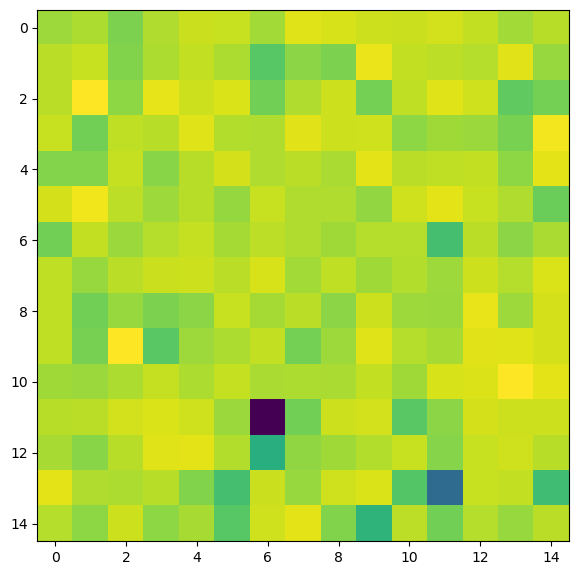

In [31]:
plot_images(knowns[63])

Text(0, 0.5, 'Number of Detections')

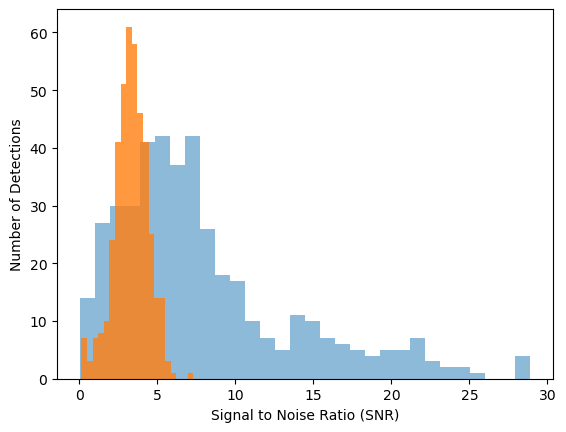

In [84]:
plt.figure()
knowns_SNRs = np.array(knowns_SNRs)
discoveries_SNRs = np.array(discoveries_SNRs)


plt.hist(knowns_SNRs[(knowns_SNRs>0) & (knowns_SNRs<30)],bins=30,alpha=0.5)
plt.hist(discoveries_SNRs[discoveries_SNRs>0],bins=20, alpha=0.8)
plt.xlabel("Signal to Noise Ratio (SNR)")
plt.ylabel("Number of Detections")

In [42]:
disc_ims = np.load("108_discoveries_ims.npy")
disc_centers = np.load("108_discoveries_coords.npy")

In [69]:
discoveries_SNRs = [calculate_snr_normalized(im, position=(center[0], center[1]), aperture_radius=2, annulus_radii=[4,5]) for im, center in zip(disc_ims, disc_centers)]

Summary stats: {'Knowns mean': 8.352776829173902, 'Knowns median': 6.540920543702702, 'Knowns std': 6.769221395379194, 'Discoveries mean': 3.308219499439518, 'Discoveries median': 3.302958589258522, 'Discoveries std': 1.0808418236698119}
Cohen's d (effect size): 1.03
Mann-Whitney U p-value (knowns > discoveries): 9.869e-50
KS test p-value: 6.026e-71


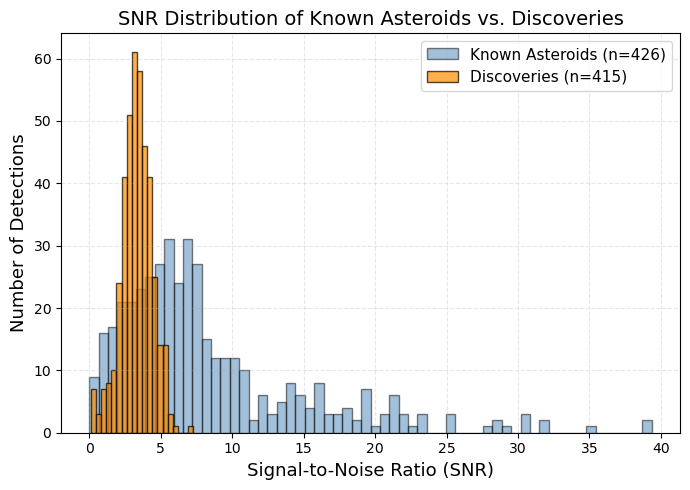

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Convert to arrays
knowns_SNRs = np.array(knowns_SNRs)
discoveries_SNRs = np.array(discoveries_SNRs)

# Filter sensible ranges
knowns_clean = knowns_SNRs[(knowns_SNRs > 0) & (knowns_SNRs < 40)]
disc_clean   = discoveries_SNRs[discoveries_SNRs > 0]

stats_summary = {
    "Knowns mean": np.mean(knowns_clean),
    "Knowns median":np.median(knowns_clean),
    "Knowns std":np.std(knowns_clean, ddof=1),
    "Discoveries mean":np.mean(disc_clean),
    "Discoveries median":np.median(disc_clean),
    "Discoveries std": np.std(disc_clean, ddof=1),
}

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(knowns_clean)-1)*np.var(knowns_clean, ddof=1) +
                      (len(disc_clean)-1)*np.var(disc_clean, ddof=1)) /
                     (len(knowns_clean)+len(disc_clean)-2))
cohens_d = (np.mean(knowns_clean) - np.mean(disc_clean)) / pooled_std

# Two-sample non-parametric tests
u_stat, u_p = stats.mannwhitneyu(knowns_clean, disc_clean, alternative='greater')
ks_stat, ks_p = stats.ks_2samp(knowns_clean, disc_clean)

print("Summary stats:", stats_summary)
print(f"Cohen's d (effect size): {cohens_d:.2f}")
print(f"Mann-Whitney U p-value (knowns > discoveries): {u_p:.3e}")
print(f"KS test p-value: {ks_p:.3e}")

plt.figure(figsize=(7,5))
plt.hist(knowns_clean, bins=60, alpha=0.5, color="steelblue", edgecolor="black",
         label=f"Known Asteroids (n={len(knowns_clean)})")
plt.hist(disc_clean, bins=20, alpha=0.7, color="darkorange", edgecolor="black",
         label=f"Discoveries (n={len(disc_clean)})")

plt.xlabel("Signal-to-Noise Ratio (SNR)", fontsize=13)
plt.ylabel("Number of Detections", fontsize=13)
plt.title("SNR Distribution of Known Asteroids vs. Discoveries", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


In [128]:
median_known = np.median(knowns_clean)
median_disc  = np.median(disc_clean)
factor_lower = median_known / median_disc
print(f"Discoveries median is {factor_lower:.2f}× lower than known asteroids")

Discoveries median is 1.98× lower than known asteroids


## Speed comparison

In [137]:
import numpy as np

ras = np.load("./Crosschecked_Dets/unique_ras_v3_pt4.npy")
decs = np.load("./Crosschecked_Dets/unique_decs_v3_pt4.npy")
pos_mjds = np.load("./Crosschecked_Dets/unique_mjds_v3_pt4.npy")


def angular_separation(ra1, dec1, ra2, dec2):

    # Convert to radians
    ra1, dec1, ra2, dec2 = map(np.radians, [ra1, dec1, ra2, dec2])
    # Spherical law of cosines
    delta = np.arccos(
        np.sin(dec1)*np.sin(dec2) +
        np.cos(dec1)*np.cos(dec2)*np.cos(ra1 - ra2)
    )
    return np.degrees(delta)

chain_motion_rates = []

for chain in final_discoveries:  # list of lists of detection indices
    if len(chain) < 2:
        # Only one detection → no motion rate
        chain_motion_rates.append(np.nan)
        continue

    # First and last detections in the chain
    first_idx = chain[0]
    last_idx  = chain[1]

    ra1, dec1 = ras[first_idx], decs[first_idx]
    ra2, dec2 = ras[last_idx],  decs[last_idx]
    # ra2, dec2 = ras[first_idx+1],  decs[first_idx+1]

    mjd1, mjd2 = pos_mjds[first_idx], pos_mjds[last_idx]

    # Compute angular separation (degrees)
    sep_deg = angular_separation(ra1, dec1, ra2, dec2)

    # Time difference (days)
    delta_days = mjd2 - mjd1
    if delta_days <= 0:
        chain_motion_rates.append(np.nan)
        continue

    # Average motion rate (deg/day)
    rate = sep_deg / delta_days
    chain_motion_rates.append(rate)

# Convert to numpy  array for easy stat
chain_motion_rates = np.array(chain_motion_rates)

print("Average motion rates (deg/day) for each chain:")
print(chain_motion_rates)

print(f"\nSummary:")
print(f"Mean:   {np.nanmean(chain_motion_rates):.3f} deg/day")
print(f"Median: {np.nanmedian(chain_motion_rates):.3f} deg/day")
print(f"Std:    {np.nanstd(chain_motion_rates):.3f} deg/day")


Motion rates (deg/day) between first and second detections:
[0.89823543 0.55467646 0.98045976 0.46697896 0.96049499 0.70678609
 0.77224692 0.92681425 0.64118277 0.57031545 0.89275949 1.02734108
 1.08803133 0.87166212 0.98672874 0.86894979 0.75925506 0.85818981
 0.94758107 0.90700193 0.81336002 1.14262746 0.99936397 0.94910853
 0.75112557 1.11344533 0.45939017 0.87076745 0.85176521 0.18968054
 0.65975067 0.72608974 0.97757684 0.84428698 0.61043482 0.78289421
 0.83060163 1.0219912  0.72100869 0.91949677 0.85328391 0.85788922
 0.85534652 1.06879214 0.79373039 0.91422842 0.87292259 0.97195224
 0.50561955 1.08088532 0.96147948 1.05753209 0.92411401 0.71578099
 0.87796062 0.75813369 0.7192511  0.94994175 0.41923988 0.99841835
 0.59405981 0.84029581 0.83243661 0.72280934 0.65364026 0.73201432
 0.87211343 0.94451029 0.89529706 0.79493289 0.86718105 0.87348006
 0.74764631 0.38184994 0.70140877 1.07200132 0.59945456 0.94621086
 1.1081399  0.81632098 0.8409617  1.0714183  1.05607681 0.89755713
 0

### got the known asteroid motion rates from cross check MPC nbk

In [105]:
known_rates = np.load("known_asteroid_S1_motion_rates_from_crosscheckMPCnbk.npy")

In [129]:
known_rates_mpc = np.load("./wise_motion_rates.npy")

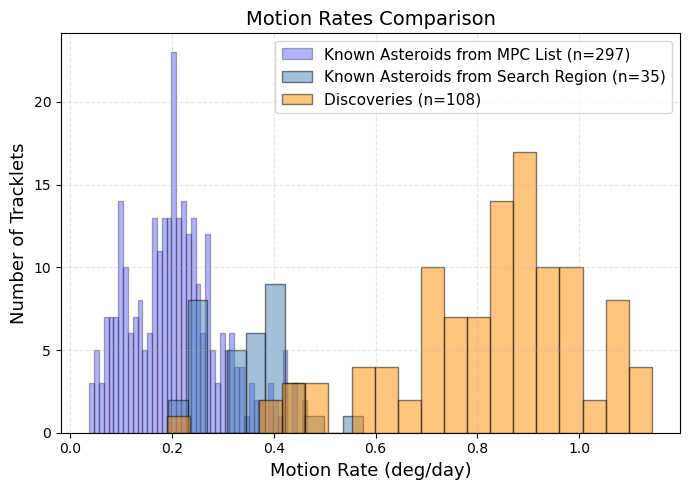

In [143]:
import matplotlib.pyplot as plt
import numpy as np


# Compute medians
median_known = np.median(known_rates)
median_disc  = np.median(chain_motion_rates)

plt.figure(figsize=(7,5))

# Histograms
plt.hist(known_rates_mpc, bins=45, alpha=0.3, color='blue', edgecolor='black',
         label=f"Known Asteroids from MPC List (n={len(known_rates_mpc)})")

plt.hist(known_rates, bins=10, alpha=0.5, color='steelblue', edgecolor='black',
         label=f"Known Asteroids from Search Region (n={len(known_rates)})")
plt.hist(chain_motion_rates, bins=21, alpha=0.5, color='darkorange', edgecolor='black',
         label=f"Discoveries (n={len(chain_motion_rates)})")

# Vertical lines for medians
# plt.axvline(median_known, color='blue', linestyle='--', linewidth=2, label=f"Known median: {median_known:.2f}")
# plt.axvline(median_disc, color='red', linestyle='--', linewidth=2, label=f"Discoveries median: {median_disc:.2f}")

plt.xlabel("Motion Rate (deg/day)", fontsize=13)
plt.ylabel("Number of Tracklets", fontsize=13)
plt.title("Motion Rates Comparison", fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


In [126]:
median_known = np.median(known_rates)
median_disc  = np.median(chain_motion_rates)

factor_faster = median_disc / median_known
percent_faster = (median_disc - median_known) / median_known * 100

print(f"Median motion rate of discoveries is {factor_faster:.2f}× that of known asteroids")
print(f"Or {percent_faster:.1f}% faster")


Median motion rate of discoveries is 2.39× that of known asteroids
Or 139.4% faster


In [9]:
import matplotlib.pyplot as plt


# Plot final links in skyplane

In [4]:
ras = np.load("./Crosschecked_Dets/unique_ras_v3_pt4.npy")
decs = np.load("./Crosschecked_Dets/unique_decs_v3_pt4.npy")

# final_discoveries

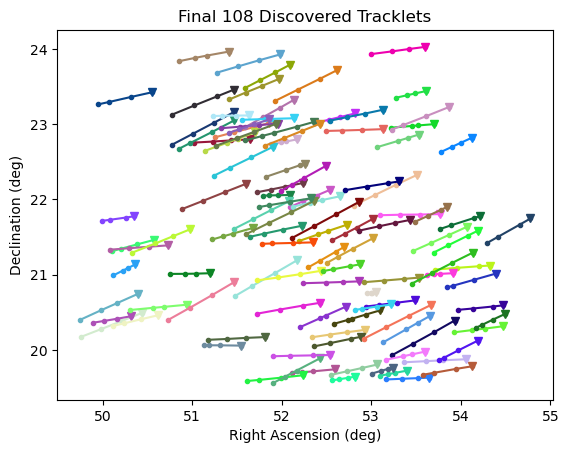

<Figure size 640x480 with 0 Axes>

In [18]:
# plt.figure()
# for link in final_discoveries:
#     r = [ras[l] for l in link]
#     d = [decs[l] for l in link]
#     plt.plot(r, d, ".-")
#     plt.plot(r[-1], d[-1], "v")




import matplotlib.pyplot as plt
import numpy as np

plt.figure()

for link in final_discoveries:
    r = [ras[l] for l in link]
    d = [decs[l] for l in link]
    color = np.random.rand(3,)
    
    plt.plot(r, d, ".-", color=color)
    plt.plot(r[-1], d[-1], "v", color=color)

plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Final 108 Discovered Tracklets")
plt.show()
plt.tight_layout()
plt.savefig("final_discoveries_tracklet_plot.jpg", format="jpg")

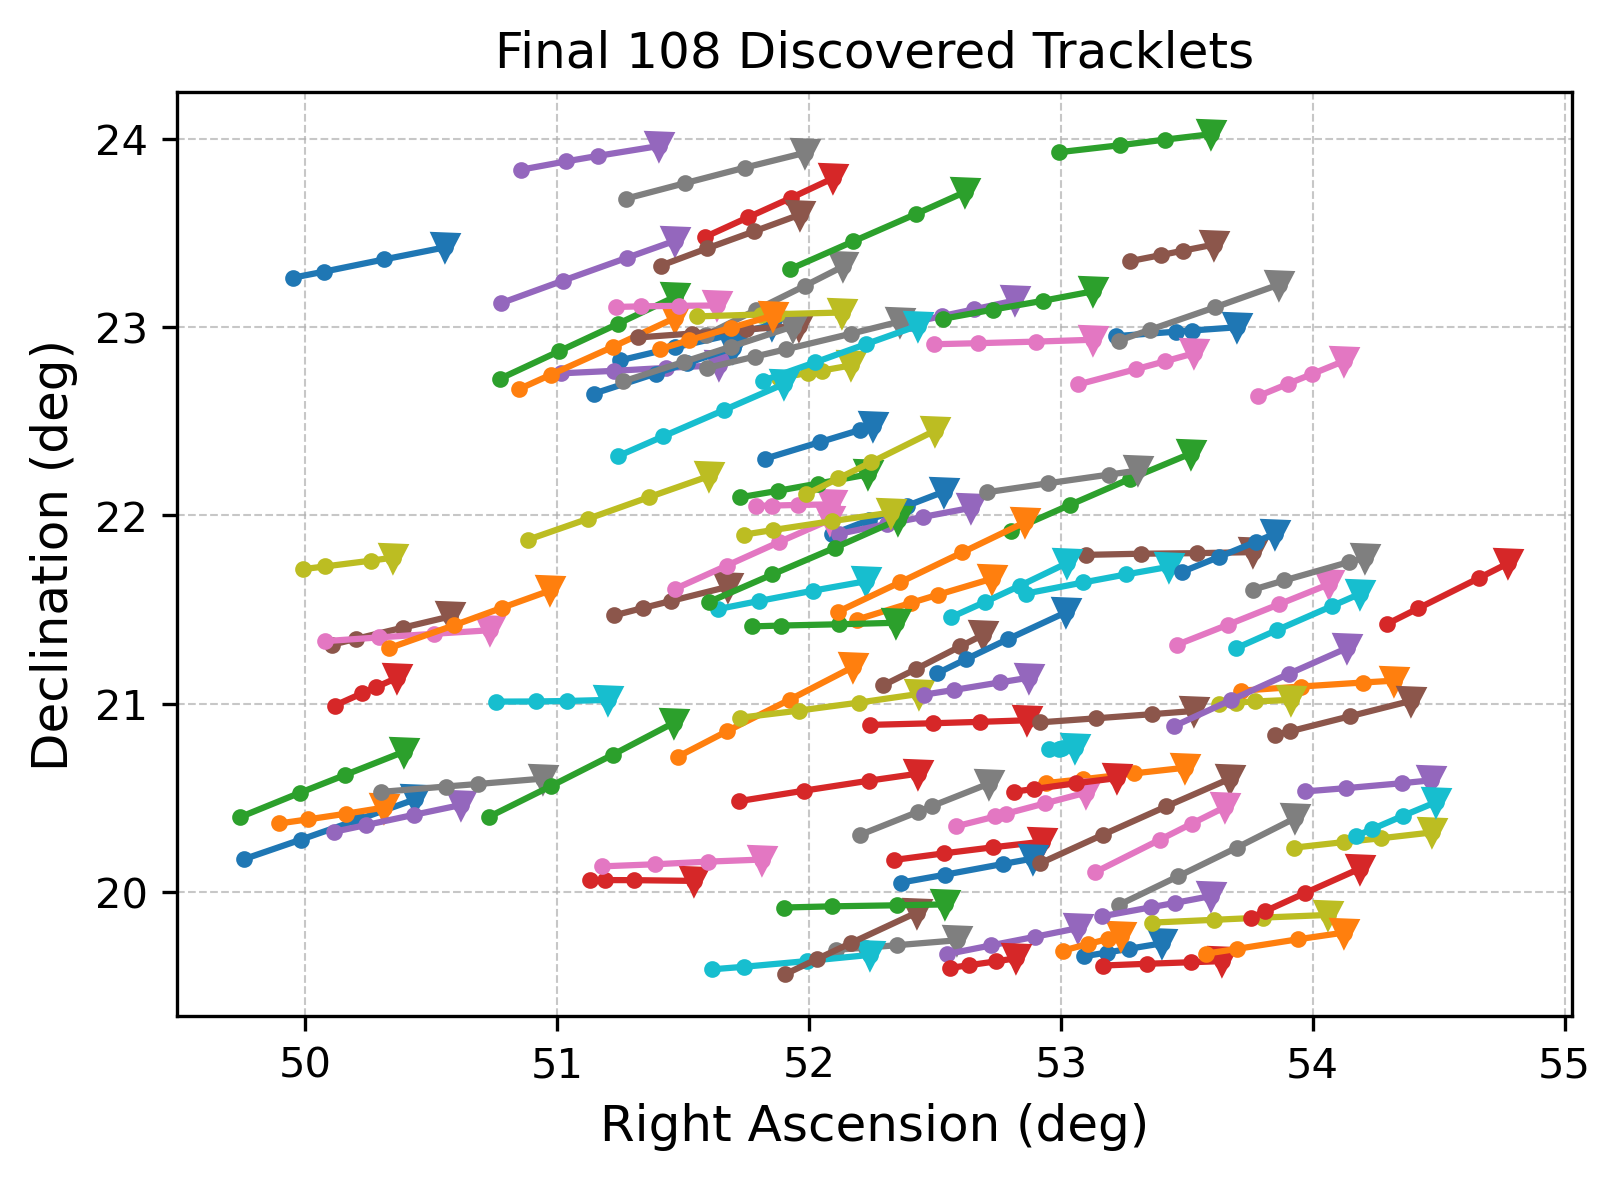

In [5]:
import matplotlib.pyplot as plt
import numpy as np


from itertools import cycle
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(6, 4), dpi=300)

for link in final_discoveries:
    r = [ras[l] for l in link]
    d = [decs[l] for l in link]

    color = next(colors)
    plt.plot(r, d, ".-", color=color, label="_nolegend_")
    plt.plot(r[-1], d[-1], "v", color=color)

plt.xlabel("Right Ascension (deg)", fontsize=12)
plt.ylabel("Declination (deg)", fontsize=12)
plt.title("Final 108 Discovered Tracklets")

# Ticks and font settings
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.show()


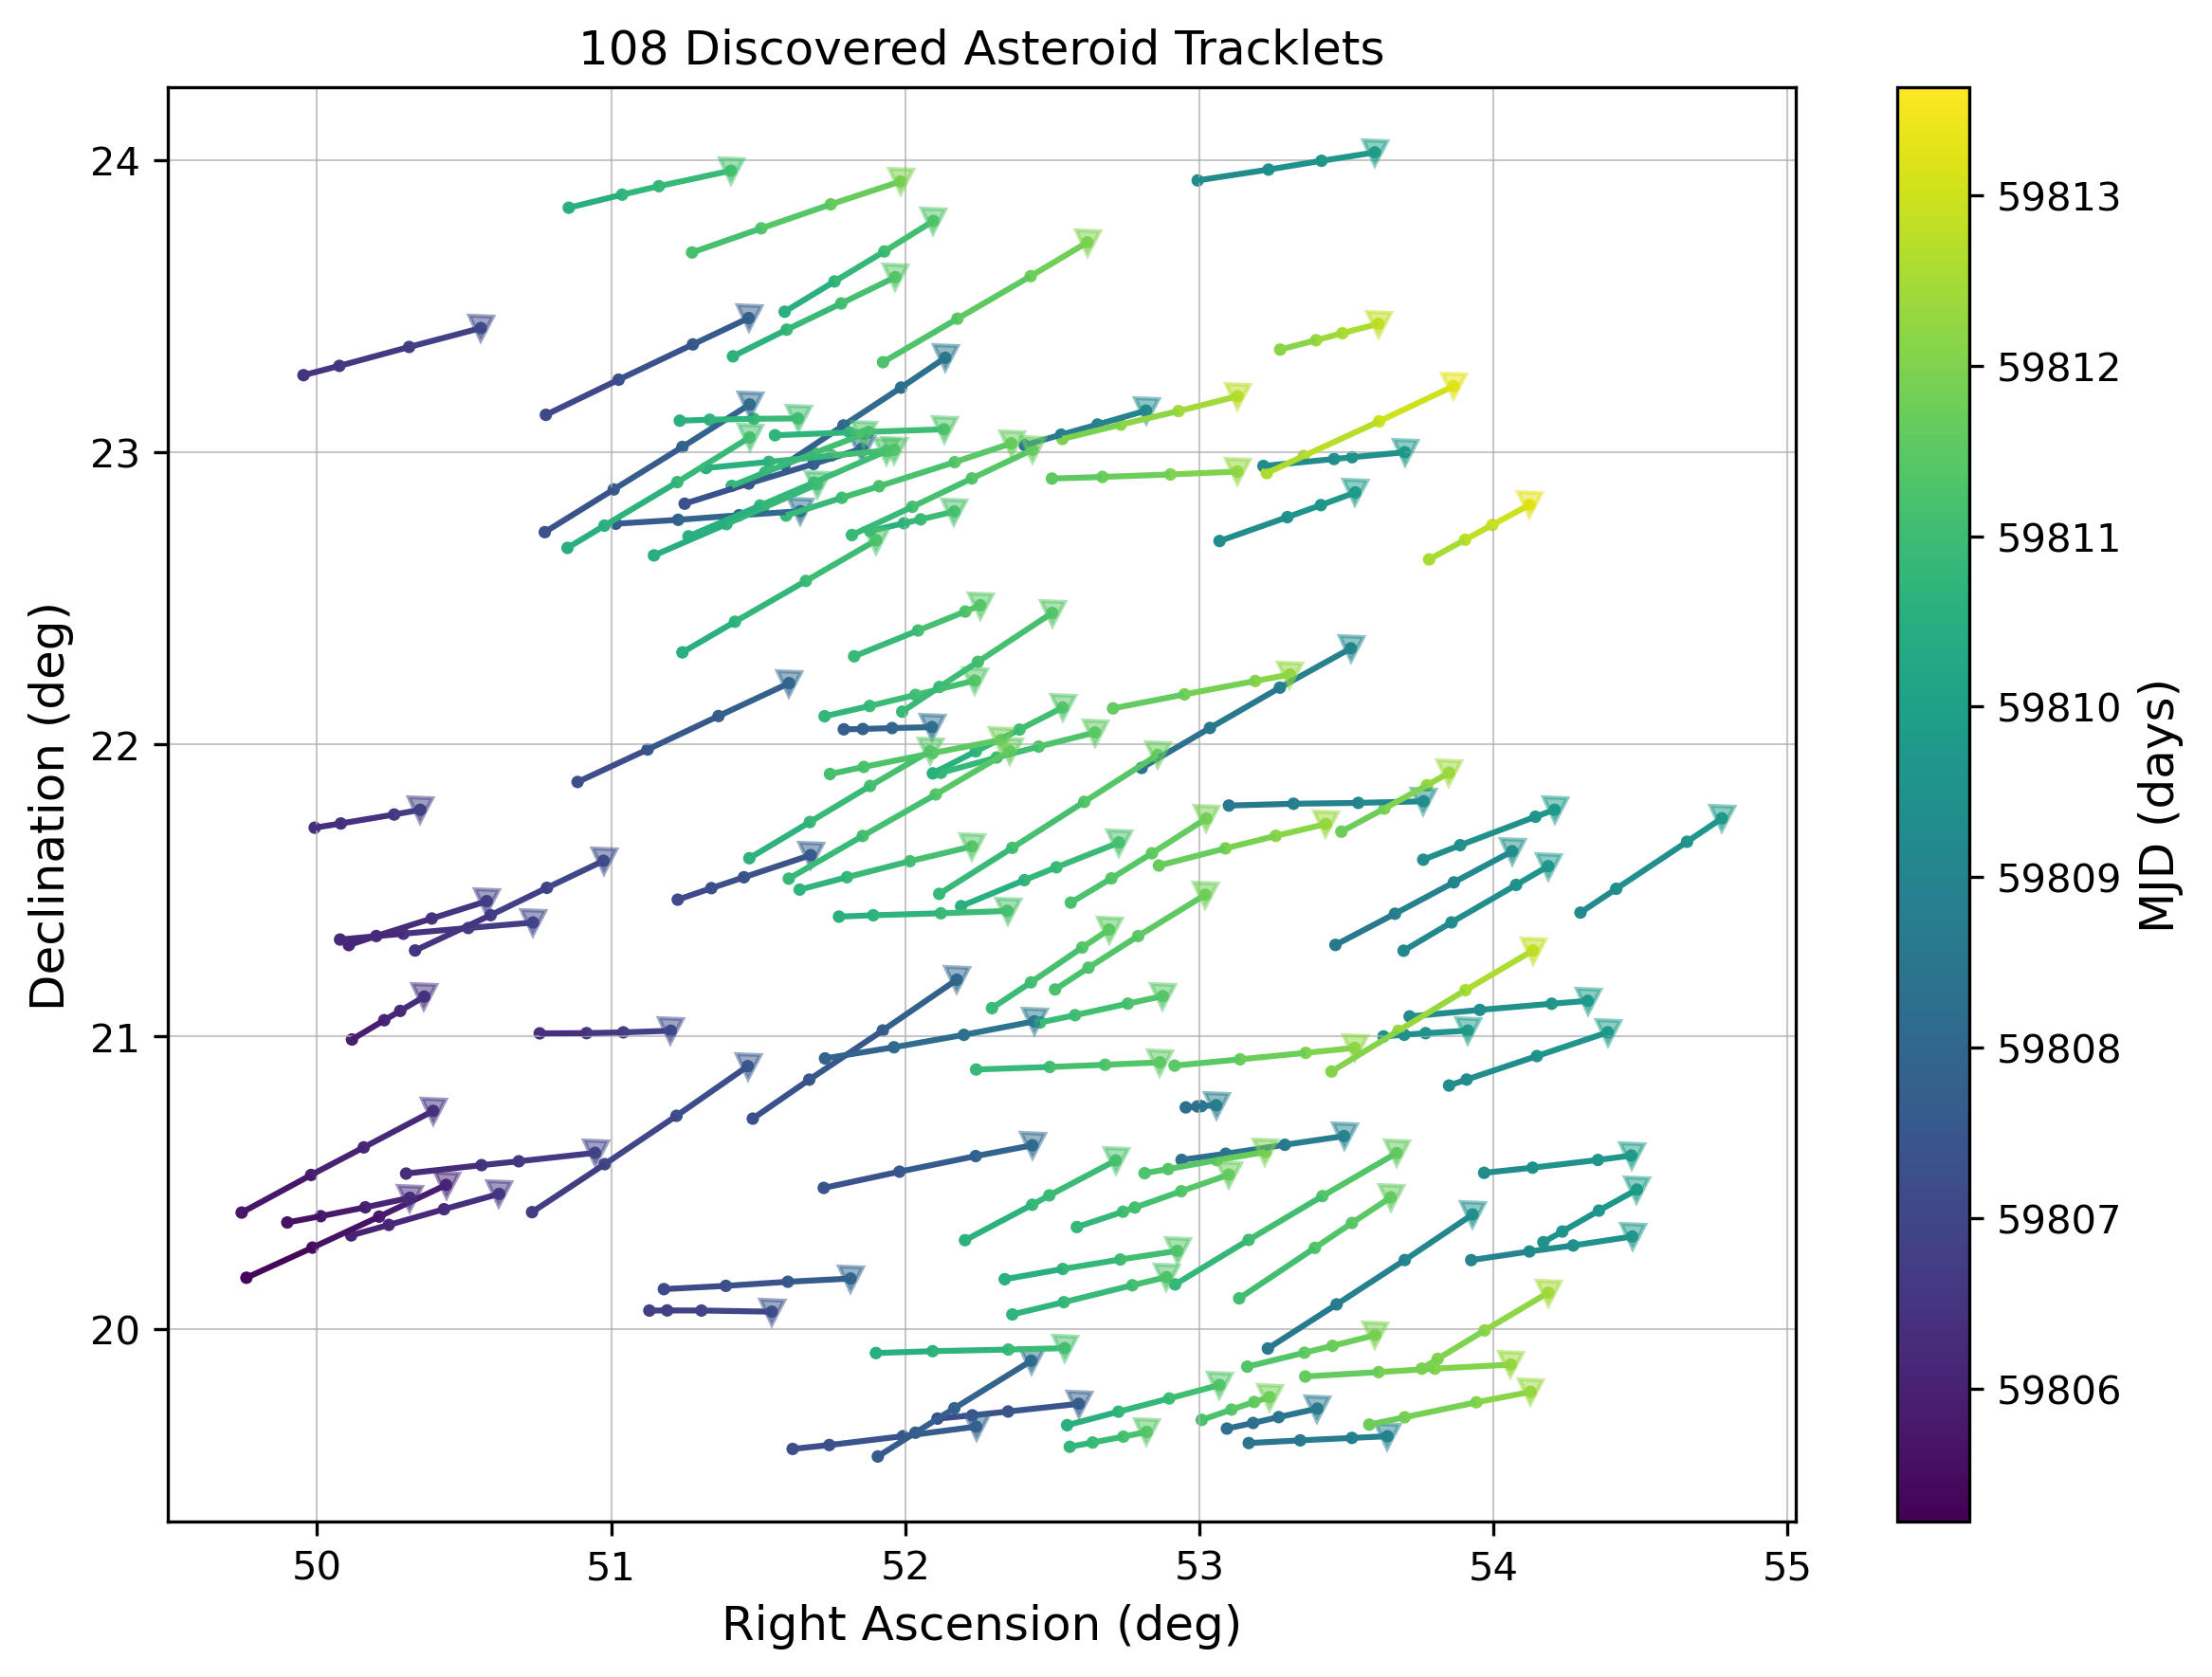

In [22]:
times = np.load("./Crosschecked_Dets/unique_mjds_v3_pt4.npy")


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize

plt.figure(figsize=(8, 6), dpi=300)

# Normalize time across all points for consistent coloring
all_times = np.array(times)
norm = Normalize(vmin=np.min(all_times), vmax=np.max(all_times))
cmap = plt.cm.viridis  # or 'plasma', 'cividis', etc.

for link in final_discoveries:
    r = np.array([ras[l] for l in link])
    d = np.array([decs[l] for l in link])
    t = np.array([times[l] for l in link])

    # Build line segments between points
    points = np.array([r, d]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(t)
    lc.set_linewidth(1.5)
    plt.gca().add_collection(lc)
    
    # Scatter the individual detections (colored by time)
    plt.scatter(r, d, c=t, cmap=cmap, norm=norm, s=10, edgecolors='none')


    # Optionally mark last point
    plt.plot(r[-1], d[-1], 'v', color=cmap(norm(t[-1])), alpha=0.5)

# Add colorbar to show time mapping
cbar = plt.colorbar(lc, ax=plt.gca())
cbar.set_label('MJD (days)', fontsize=12)

plt.title("108 Discovered Asteroid Tracklets")
plt.xlabel("Right Ascension (deg)", fontsize=12)
plt.ylabel("Declination (deg)", fontsize=12)
plt.grid(True, linestyle="-", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig("tracks_colored_by_time.pdf")
plt.show()


/tmp/ipykernel_12817/2907034630.py:27: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages(OUTPUT_PDF) as pdf:


NameError: name 'good_noise_scores_results' is not defined

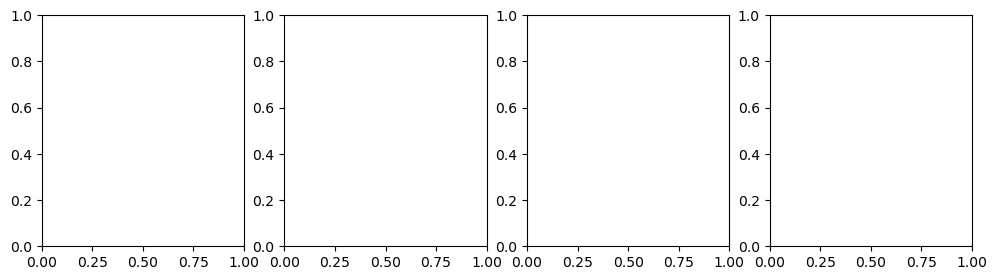

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# -------- Load Your Data --------
ras = np.load("./Crosschecked_Dets/unique_ras_v3_pt4.npy")
decs = np.load("./Crosschecked_Dets/unique_decs_v3_pt4.npy")
predictedCoords = np.load("./unique_pixCoords_v3_pt4.npy")
W2ims = np.load("./unique_Images_v3_pt4.npy")
pos_confidences = np.load("./Searches/v3_all_confidences_S1.npy")
pos_confidences = [p for p in pos_confidences if p >= 0.4]



circle_radius = 2
N_TRACKLETS = 5  # change this to plot more/less
OUTPUT_PDF = "tracklet_images_with_scores.pdf"

with PdfPages(OUTPUT_PDF) as pdf:
    all_idx = 0
    for tracklet_idx, chain in enumerate(final_discoveries[:N_TRACKLETS]):
        chain_length = len(chain)

        fig, axes = plt.subplots(
            1, chain_length,
            figsize=(chain_length * 3, 3),  # single row
            squeeze=False
        )

        for col, img_idx in enumerate(chain):
            conf = pos_confidences[img_idx]

            # Noise scores
            count_score = good_noise_scores_results["count"][all_idx]
            flux_score = good_noise_scores_results["flux"][all_idx]
            p_count_score = good_noise_scores_results["p_count"][all_idx]
            p_flux_score = good_noise_scores_results["p_flux"][all_idx]
            p_noise_score = good_noise_scores_results["p_combined"][all_idx]

            # Load image and reshape if needed
            img = W2ims[img_idx]
            if img.ndim == 1 and img.size == 225:
                img = img.reshape(15, 15)

            ax = axes[0, col]
            ax.imshow(img, cmap='gray', origin='lower')
            ax.axis('off')

            # Draw red circle at predicted coordinates
            x, y = predictedCoords[img_idx]
            circ = plt.Circle((x, y), radius=circle_radius, edgecolor='red', facecolor='none', linewidth=2)
            ax.add_patch(circ)

            # Title: confidence + noise scores
            title_text = f"Conf: {conf:.2f}\n" \
                         f"p_noise: {p_noise_score:.5f}\n" \
                         f"p_flux: {p_flux_score:.3f}"
            ax.set_title(title_text, fontsize=8)

            all_idx += 1

        fig.suptitle(f"Tracklet {tracklet_idx + 1}: {chain_length} detections", fontsize=12)
        plt.tight_layout(rect=[0, 0.03, 1, 0.90])
        pdf.savefig(fig)
        plt.close(fig)

print(f"Saved {N_TRACKLETS} tracklets to: {OUTPUT_PDF}")
